<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/37_GroverAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from math import ceil, log2
N = 8
n = ceil(log2(N))
n

3

In [4]:
from random import randint
winner_index = randint(0,N-1)
winner_index

1

In [5]:
winner_state = bin(winner_index)[2:].zfill(n)
winner_state

'001'

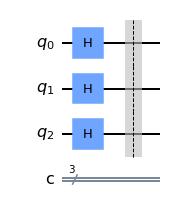

In [6]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(n,n)
for i in range(n):
    qc.h(i)
qc.barrier()
qc.draw('mpl')

In [7]:
def Householder():
    import numpy as np
    Refl = np.identity(N)
    Refl[winner_index,winner_index]=-1
    from qiskit.quantum_info import Operator
    Refl_Op = Operator(Refl)
    n_qubits = []
    for i in range(n):
        n_qubits.append(i)
    qc.unitary(Refl_Op,qubits=n_qubits, label = 'Uw')
    qc.barrier()
    return qc

In [8]:
def Diffucion():
    for i in range(n):
        qc.x(i)
        qc.h(i)
    qc.h(0)
    controls = []
    for i in range(1,n):
        controls.append(i)
    qc.mct(controls,0)
    qc.h(0)
    for i in range(n):
        qc.x(i)
        qc.h(i)
    qc.barrier()
    return qc

In [9]:
from math import pi, sqrt, asin
theta = asin(1/sqrt(N))
t = ceil(pi/(4*theta)-0.5)
t

2

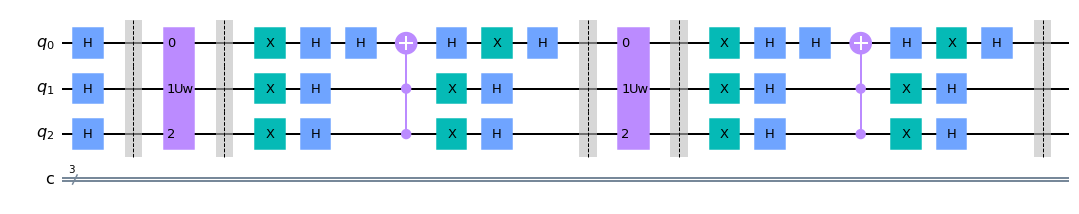

In [10]:
for i in range(t):
    Householder()
    Diffucion()
qc.draw('mpl')

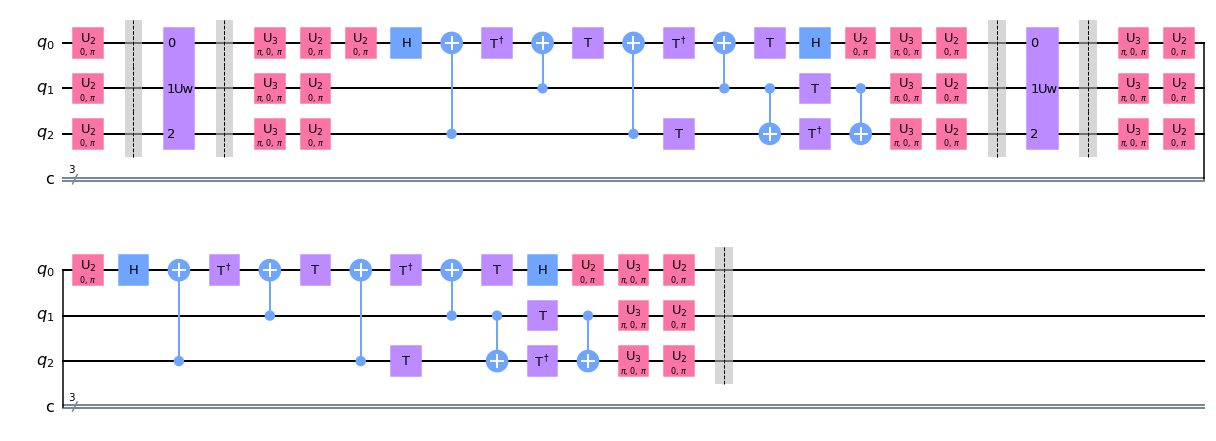

In [11]:
qc.decompose().draw('mpl')

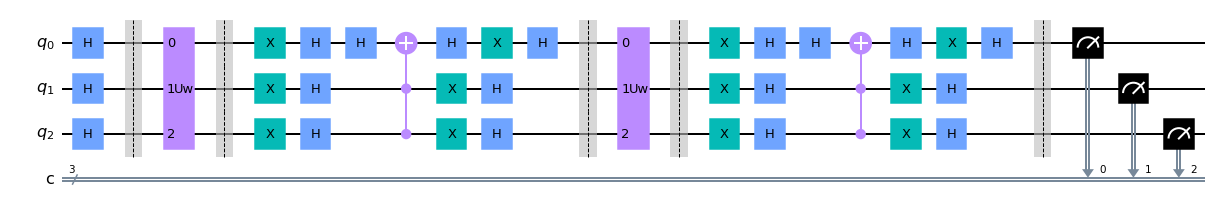

In [12]:
for i in range(n):
    qc.measure(i,i)
qc.draw('mpl')

{'101': 138, '100': 19, '111': 15, '011': 148, '110': 770, '010': 12, '000': 147, '001': 799}


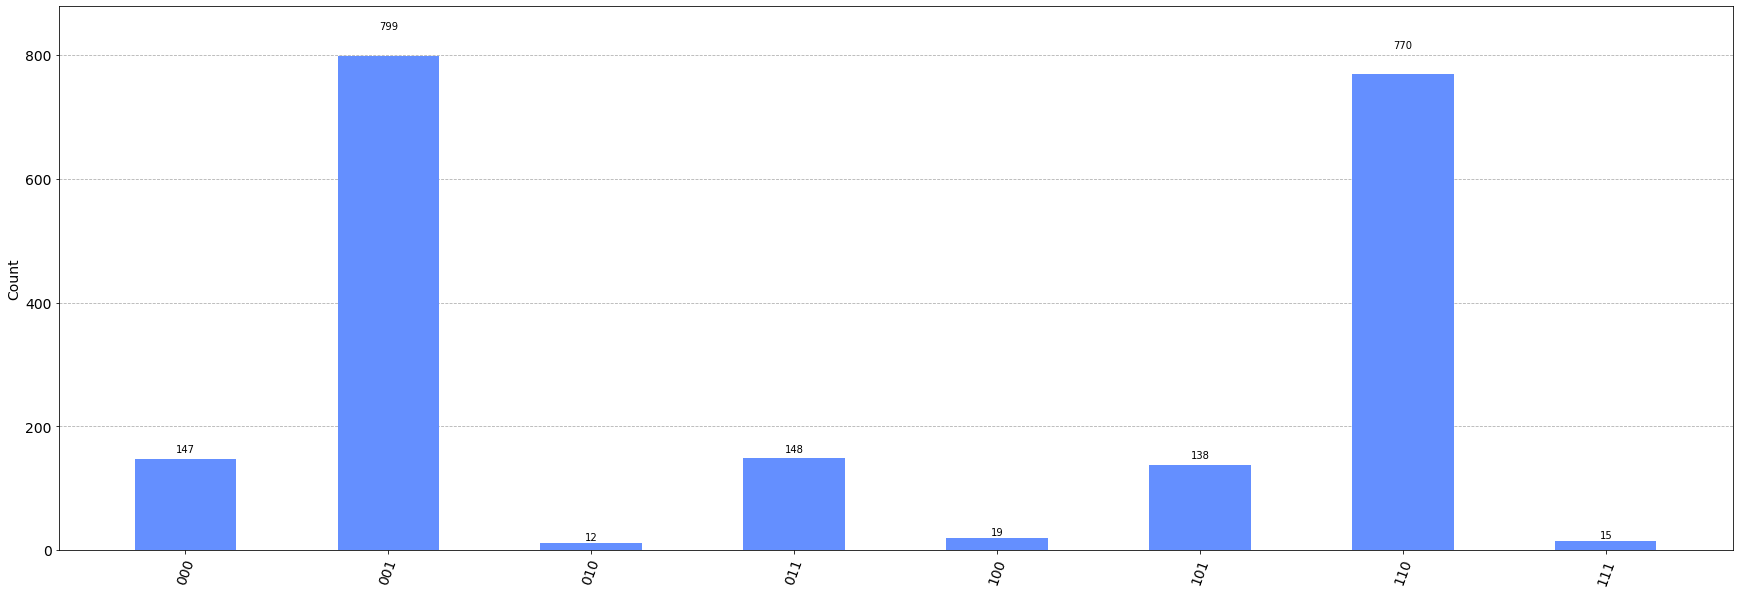

In [13]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 2048)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(30,10))

In [14]:
from qiskit.test.mock import FakeMontreal
device_simulator = FakeMontreal()

<ipython-input-14-a78fdba9d748>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeMontreal


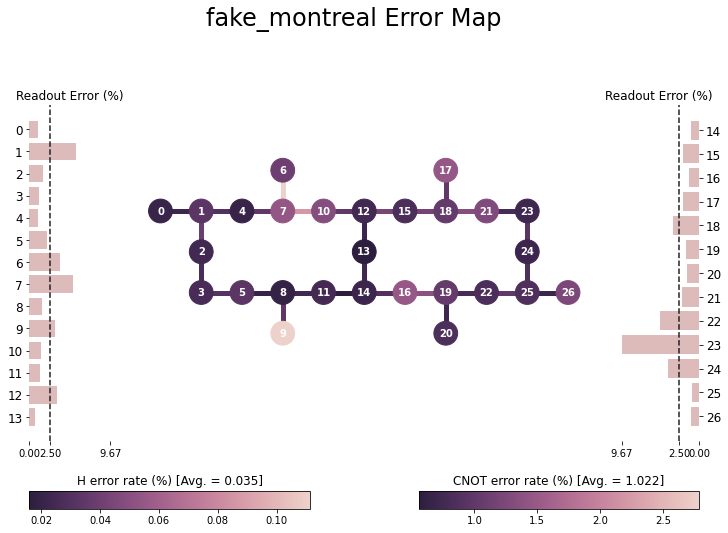

In [15]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

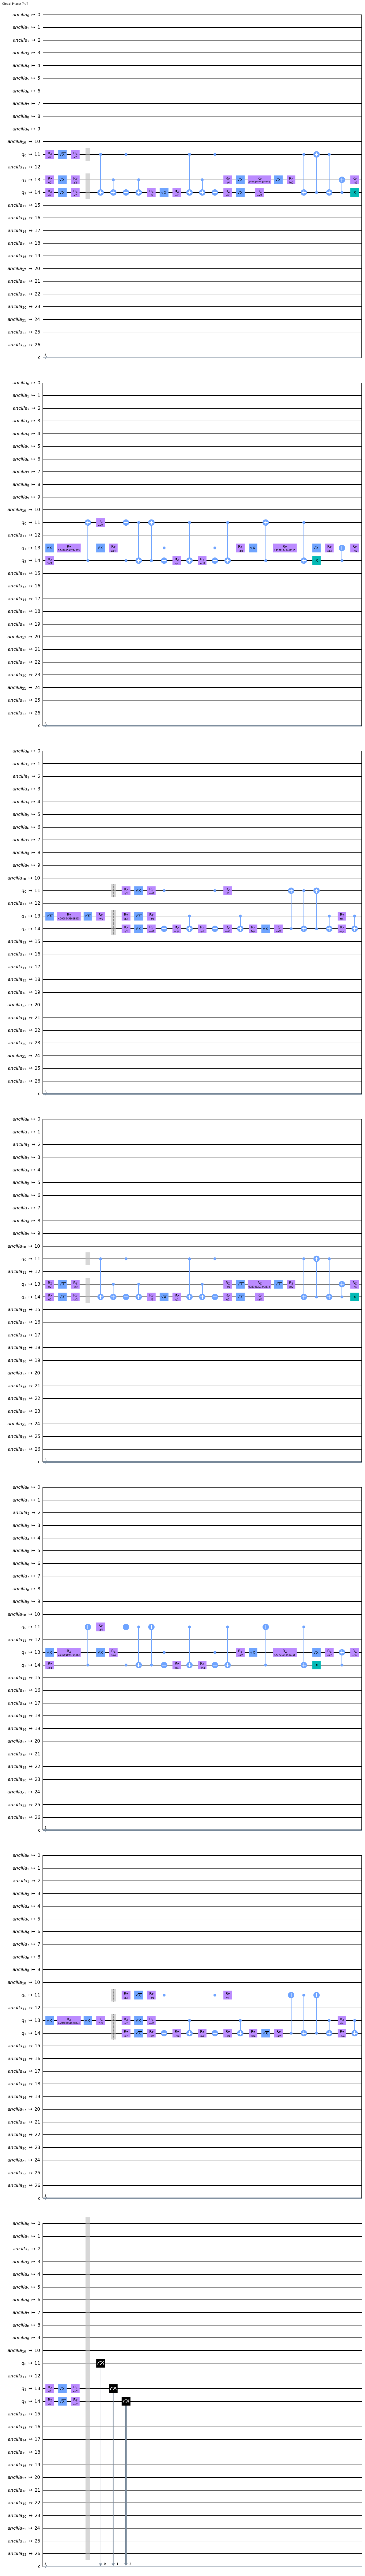

In [16]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

{'100': 63, '000': 90, '010': 79, '110': 295, '111': 58, '011': 77, '001': 272, '101': 90}


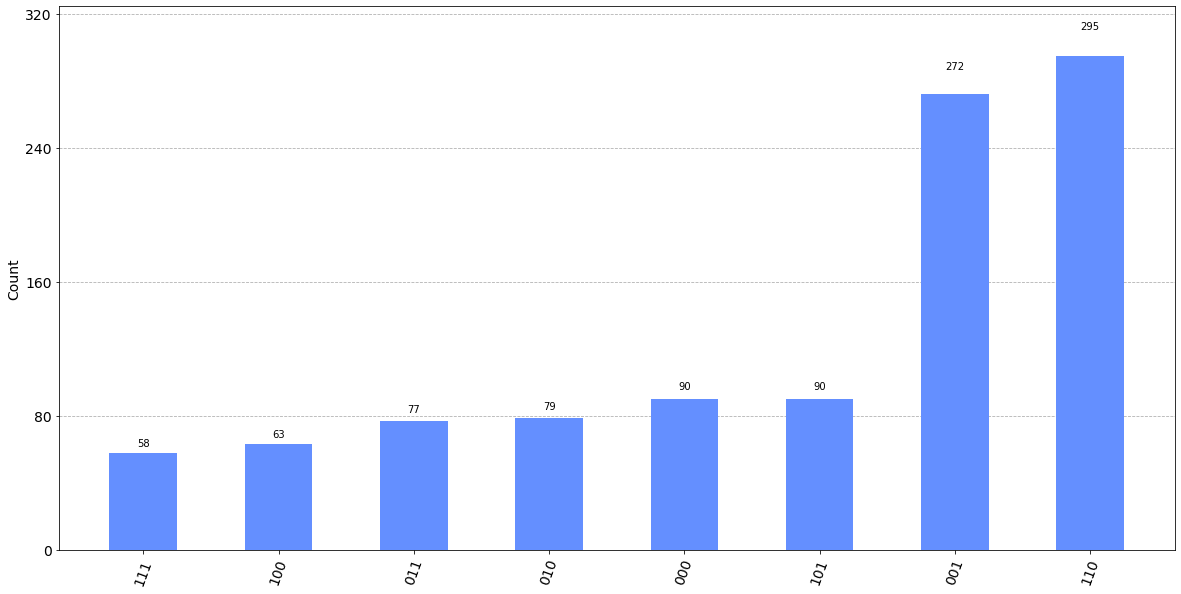

In [17]:
job = device_simulator.run(qc2,shots = 2048)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10),sort = 'value')